datascience module update

In [2]:
!pip install datascience --upgrade

Requirement already up-to-date: datascience in /usr/local/lib/python3.6/dist-packages (0.15.6)


import

In [3]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')
import pandas as pd
import datetime

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  after removing the cwd from sys.path.


drive mount

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


csv 전처리 과정

csv 파일 읽기

In [145]:
data=pd.read_csv('/content/drive/My Drive/20152255정찬호/20152255-data1.csv')

카테고리 정보가 들어있는 json 파일을 읽어 데이터 가져오기

In [146]:
cat_data=pd.read_json("/content/drive/My Drive/20152255정찬호/US_category_id.json")
cat_items=cat_data['items']
for idx in range(0, cat_items.count()):
    cat_data.loc[idx,'id'] = cat_items[idx]['id']
    cat_data.loc[idx,'category'] = cat_items[idx]['snippet']['title']
cat_data=cat_data.drop(columns=['kind','etag','items'])
cat_data

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


json파일의 카테고리 데이터와 기존 csv data를 매칭시켜 합병하기

In [147]:
cat_data['id']=cat_data['id'].astype('int64')
data=pd.merge(data, cat_data, left_on='category_id', right_on='id', how='left')
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,15,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,22,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,24,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,1,Film & Animation


비디오가 삭제, 오류가 없고 & 평가 가능 & 댓글 가능 & video id가 식별 가능한 열만 idx로 저장 

In [148]:
idx=(data['video_error_or_removed']==False) & (data['ratings_disabled']==False) & (data['comments_disabled']==False) & (data['video_id']!='#NAME?')
data=data.loc[idx,:]

In [149]:
data=data.drop(columns=['comments_disabled','ratings_disabled','video_error_or_removed'])
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,id,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",24,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,24,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,24,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,The Cat Who Caught the Laser - Aaron's Animals,15,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,NaN,22,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,I had so much fun transforming Safiyas hair in...,24,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,How Black Panther Should Have EndedWatch More ...,1,Film & Animation


trending_date 를 datetime 변수로 캐스팅

In [150]:
data['trending_date']=pd.to_datetime(data['trending_date'], format='%y.%d.%m').dt.date

In [151]:
data['trending_date']

0        2017-11-14
1        2017-11-14
2        2017-11-14
3        2017-11-14
4        2017-11-14
            ...    
40944    2018-06-14
40945    2018-06-14
40946    2018-06-14
40947    2018-06-14
40948    2018-06-14
Name: trending_date, Length: 40230, dtype: object

In [152]:
data[['publish_date','publish_time']]=data['publish_time'].str.split('T', expand=True)

In [153]:
data[['publish_date','publish_time']]

,publish_date,publish_time
0,2017-11-13,17:13:01.000Z
1,2017-11-13,07:30:00.000Z
2,2017-11-12,19:05:24.000Z
3,2017-11-13,11:00:04.000Z
4,2017-11-12,18:01:41.000Z
...,...,...
40944,2018-05-18,13:00:04.000Z
40945,2018-05-18,01:00:06.000Z
40946,2018-05-18,17:34:22.000Z
40947,2018-05-17,17:00:04.000Z


In [154]:
data['publish_date']=pd.to_datetime(data['publish_date']).dt.date

인기동영상 등록일 - 영상 등록일 => 인기동영상 등록까지 걸린 시간을 trending_days에 저장

In [155]:
data['trending_days']=(data['trending_date']-data['publish_date']).dt.days

In [156]:
data['trending_days']

0         1
1         1
2         2
3         1
4         2
         ..
40944    27
40945    27
40946    27
40947    28
40948    28
Name: trending_days, Length: 40230, dtype: int64

태그의 갯수를 | 기준으로 카운트해서 tag_count에 저장

In [157]:
data['tag_count']=data['tags'].apply(lambda x: len(x.split("|")) if x != '[none]' else 0)

In [158]:
data['tag_count']

0         1
1         4
2        23
3        27
4        14
         ..
40944    14
40945     0
40946    24
40947    22
40948     4
Name: tag_count, Length: 40230, dtype: int64

In [ ]:
data

정리된 내용을 csv로 저장

In [160]:
data.to_csv('/content/drive/My Drive/20152255정찬호/20152255-data2.csv')

정리가 완료된 csv를 읽어옴

In [4]:
yt_table=Table.read_table('/content/drive/My Drive/20152255정찬호/20152255-data2.csv')

카테고리가 nan 으로 식별이 불가한 내용 제거

In [5]:
yt_table=yt_table.where('category',are.not_contained_in('nan'))
yt_table

Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,id,category,publish_date,trending_days,tag_count
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmar ...,22,People & Blogs,2017-11-13,1,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver ...,LastWeekTonight,24,07:30:00.000Z,"last week tonight trump presidency|""last week tonight do ...",2.41878e+06,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John Oliver di ...",24,Entertainment,2017-11-13,1,4
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""| ...",3.19143e+06,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.yo ...,23,Comedy,2017-11-12,2,23
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""rhett and ...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amateur or a s ...,24,Entertainment,2017-11-13,1,27
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""idy""|""rhpc ...",2.09573e+06,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,"I know it's been a while since we did this show, but we' ...",24,Entertainment,2017-11-12,2,14
5,gHZ1Qz0KiKM,2017-11-14,2 Weeks with iPhone X,iJustine,28,19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""apple""|""iphone ...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,Using the iPhone for the past two weeks -- here's my tho ...,28,Science & Technology,2017-11-13,1,7
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Episode 1730"" ...",2.10342e+06,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,Embattled Alabama Senate candidate Roy Moore (Mikey Day) ...,24,Entertainment,2017-11-12,2,42
7,nc99ccSXST0,2017-11-14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwich Maker""|"" ...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,Ice Cream Pint Combination Lock - http://amzn.to/2ACipdI ...,28,Science & Technology,2017-11-12,2,13
8,jr9QtXwC9vc,2017-11-14,The Greatest Showman | Official Trailer 2 [HD] | 20th Ce ...,20th Century Fox,1,14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Zac Efron""|"" ...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,"Inspired by the imagination of P.T. Barnum, The Greatest ...",1,Film & Animation,2017-11-13,1,28
9,TUmyygCMMGA,2017-11-14,Why the rise of the robots won’t mean the end of work,Vox,25,13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future of work""| ...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,"For now, at least, we have better things to worry about. ...",25,News & Politics,2017-11-13,1,20


stadard_unit ~ bootstrap 까지 수업시간에 사용한 코드 활용

In [69]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x)) 

def bootstrap_slope(table, x, y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right) 

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

임의로 Entertain 카테고리의 인기 동영상 선정까지 걸린 시간을 hist로 나타냄

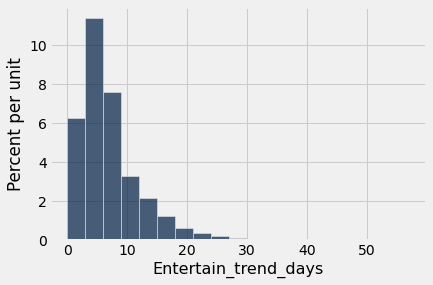

In [240]:
results=yt_table.where('category_id',are.equal_to(24))['trending_days']
temp=Table().with_column('Entertain_trend_days', results)
temp.hist(bins=np.arange(0,60,3))

그래프 모양을 보고 평균이 아닌 중간값을 사용하기로 결정

4-1) 영상 카테고리와 인기 동영상 선정 시간과의 관계를 분석

In [242]:
cat_trending_days=yt_table.group('category',np.median)['trending_days median']

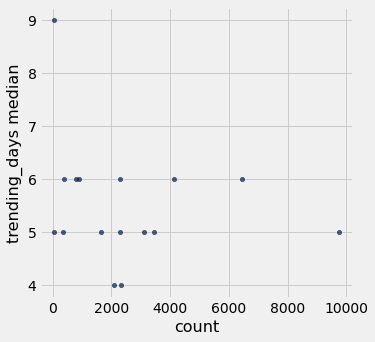

In [243]:
trending_table=yt_table.group('category').with_column('trending_days median',cat_trending_days)
trending_table.scatter('count','trending_days median')

In [246]:
t_r=correlation(trending_table,'count','trending_days median')
t_slope=slope(trending_table,'count','trending_days median')
t_intercept=intercept(trending_table,'count','trending_days median')

t_r : 상관계수 r
t_slope : 기울기
t_intercept : 절편

In [247]:
t_r, t_slope, t_intercept

(-0.20733541243673306, -9.300729824818304e-05, 5.73334368539241)

In [253]:
trend_days_predictions = trending_table.drop('category').with_column(
    'Regression Prediction', t_slope*trending_table.column('count') + t_intercept
)
trend_days_predictions

count,trending_days median,Regression Prediction
369,5,5.69902
3455,5,5.412
1644,5,5.58044
9749,5,4.82662
2301,6,5.51933
797,6,5.65922
4127,6,5.3495
6444,6,5.134
2313,4,5.51822
53,5,5.72841


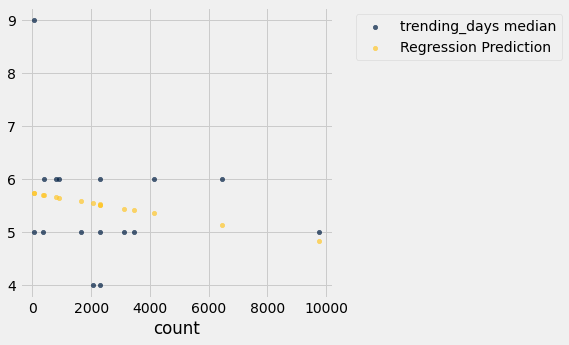

In [256]:
trend_days_predictions.scatter('count')

Slope of regression line: -9.300729824818304e-05
Approximate 95%-confidence interval for the true slope:
-0.0005938533313640797 9.922332941900761e-05


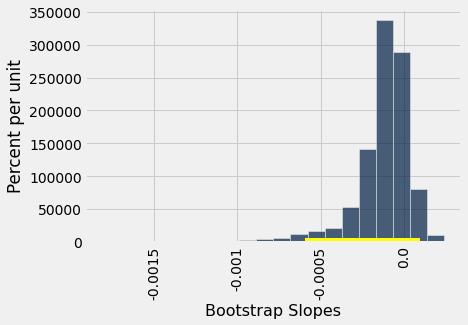

In [259]:
bootstrap_slope(trending_table,'count','trending_days median',5000)

4-2) 카테고리 영상과 조회수의 관계

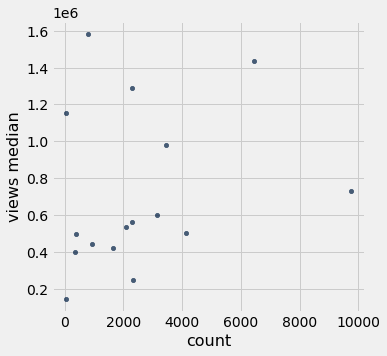

In [25]:
cat_views=yt_table.group('category',np.median)['views median']
views_table=yt_table.group('category').with_column('views median',cat_views)
views_table.scatter('count','views median')

In [27]:
v_r=correlation(views_table,'count','views median')
v_slope=slope(views_table,'count','views median')
v_intercept=intercept(views_table,'count','views median')

In [28]:
v_r, v_slope, v_intercept

(0.21069326119191245, 35.55638440808809, 631072.1010681579)

In [29]:
views_table

category,count,views median
Autos & Vehicles,369,400237
Comedy,3455,980568
Education,1644,420549
Entertainment,9749,732055
Film & Animation,2301,1.28931e+06
Gaming,797,1.58192e+06
Howto & Style,4127,502404
Music,6444,1.43569e+06
News & Politics,2313,248968
Nonprofits & Activism,53,144532


In [30]:
views_predictions = views_table.drop('category').with_column(
    'Regression Prediction', v_slope*views_table.column('count') + v_intercept
)
views_predictions

count,views median,Regression Prediction
369,400237,644192
3455,980568,753919
1644,420549,689527
9749,732055,977711
2301,1.28931e+06,712887
797,1.58192e+06,659411
4127,502404,777813
6444,1.43569e+06,860197
2313,248968,713314
53,144532,632957


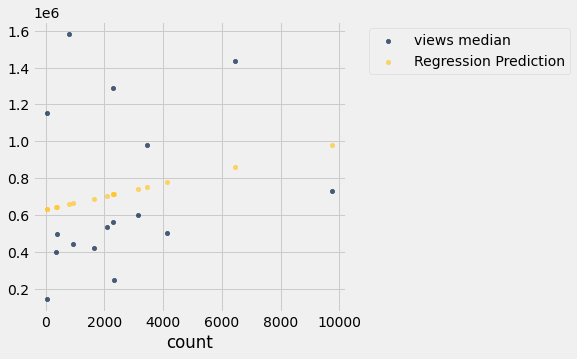

In [31]:
views_predictions.scatter('count')

Slope of regression line: 35.55638440808809
Approximate 95%-confidence interval for the true slope:
-64.50260899088545 153.3258179030676


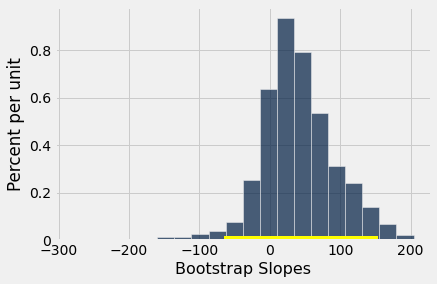

In [32]:
bootstrap_slope(views_table,'count','views median',5000)

4-3) 태그와 조회수의 관계 분석

In [ ]:
tag_view_t = Table().with_columns(
    'tag_count', yt_table['tag_count'],
    'views', yt_table['views']
)
tag_view_t

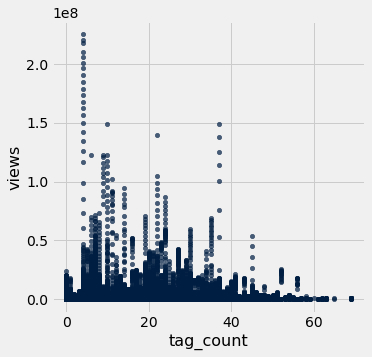

In [48]:
tag_view_t.scatter('tag_count', 'views')

In [49]:
view_r=correlation(tag_view_t,'tag_count','views')
view_slope=slope(tag_view_t,'tag_count','views')
view_intercept=intercept(tag_view_t,'tag_count','views')
view_r, view_slope, view_intercept

(-0.028301759818877777, -17409.893342048894, 2705457.46082546)

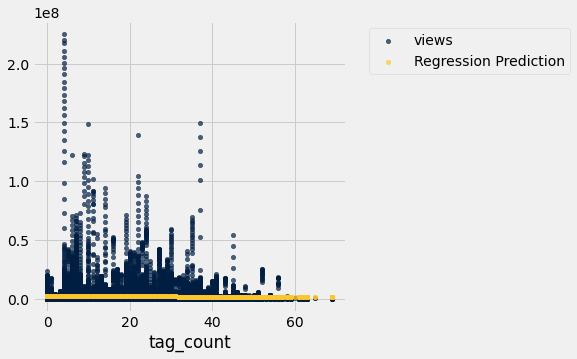

In [51]:
views_tag_predictions = tag_view_t.with_column(
    'Regression Prediction', view_slope*tag_view_t.column('tag_count') + view_intercept
)
views_tag_predictions.scatter('tag_count')

Slope of regression line: -17409.893342048894
Approximate 95%-confidence interval for the true slope:
-23814.198776621193 -11272.501176283233


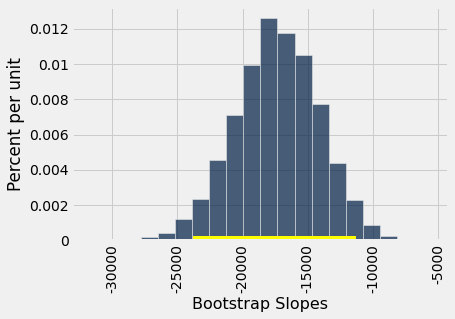

In [52]:
bootstrap_slope(tag_view_t,'tag_count','views',5000)

In [ ]:
tag_view_t = tag_view_t.with_columns(
        'Fitted Value', fit(tag_view_t, 'tag_count', 'views'),
        'Residual', residual(tag_view_t, 'tag_count', 'views')
    )

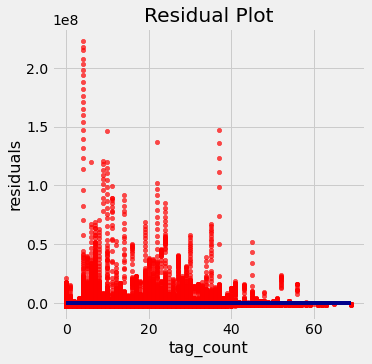

In [59]:
residual_plot(tag_view_t, 'tag_count', 'views')

4-4)태그와 인기영상 선정 시간 관계 분석

In [39]:
tag_day_t= Table().with_columns(
    'tag_count', yt_table['tag_count'],
    'days', yt_table['trending_days']
)
tag_day_t

tag_count,days
1,1
4,1
23,2
27,1
14,2
7,1
42,2
13,2
28,1
20,1


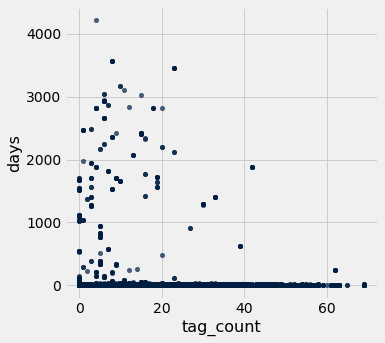

In [40]:
tag_day_t.scatter('tag_count','days')

In [ ]:
tag_r=correlation(tag_day_t,'tag_count','days')
tag_slope=slope(tag_day_t,'tag_count','days')
tag_intercept=intercept(tag_day_t,'tag_count','days')

In [61]:
tag_r, tag_slope, tag_intercept

(-0.5608308175742539, -0.6703559085011735, 29.90020000367482)

In [62]:
days_predictions = tag_day_t.with_column(
    'Regression Prediction', tag_slope*tag_day_t.column('tag_count') + tag_intercept
)
days_predictions

tag_count,days,Regression Prediction
1,1,29.2298
4,1,27.2188
23,2,14.482
27,1,11.8006
14,2,20.5152
7,1,25.2077
42,2,1.74525
13,2,21.1856
28,1,11.1302
20,1,16.4931


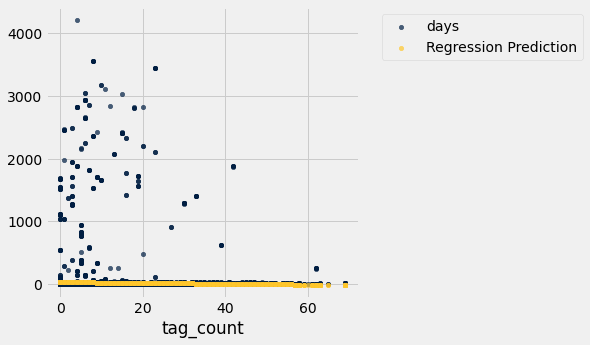

In [63]:
days_predictions.scatter('tag_count')

Slope of regression line: -0.6703559085011735
Approximate 95%-confidence interval for the true slope:
-0.7964453825896382 -0.5505041943766249


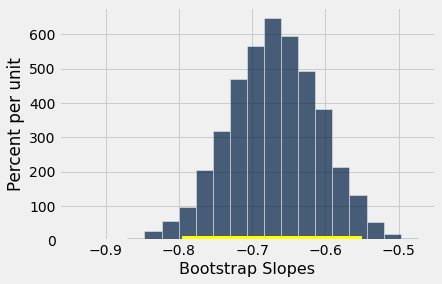

In [46]:
bootstrap_slope(tag_day_t,'tag_count','days',5000)

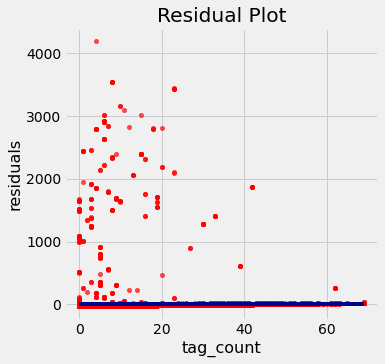

In [70]:
residual_plot(tag_day_t, 'tag_count', 'days')